### Аналитика в авиакомпании
___
##### В  качестве аналитика компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.  Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
___
###### Данное исследование разделим на несколько шагов. 

#### Шаг 1. Изучение общей информации: 
* [1.1. Загрузка библиотек, открытие и сохранение файлов](#1-bullet)
* [1.2. Получение и рассмотрение общей информации о таблицах](#2-bullet)

#### Шаг 2. Подготовка даных:
* [2.1. Проверка типов данных](#3-bullet)

#### Шаг 3. Исследовательский анализ данных:
* [3.1. Выбор топ-10 городов по количеству рейсов](#4-bullet)
* [3.2. Построение соответствующих графиков](#5-bullet)

#### Шаг 4. Основные выводы
* [4.1. Основные выводы](#6-bullet)

### Шаг 1. Изучение общей информации

<a id='1-bullet'></a>
#### 1.1. Загрузим библиотеки, откроем и сохраним файлы

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import requests 
from bs4 import BeautifulSoup

# открываем и сохраняем файлы
data1 = pd.read_csv('/datasets/query_1.csv', sep=',')
data2 = pd.read_csv('/datasets/query_3.csv', sep=',')

<a id='2-bullet'></a>
#### 1.2. Рассмотрим общую информацию о полученных таблицах

In [2]:
# рассмотрим общую информацию о таблице data1
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
# рассмотрим общую информацию о таблице data2
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [4]:
# проверим таблицу data1 на наличие дупликатов
data1.duplicated().sum

<bound method Series.sum of 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool>

In [5]:
# проверим таблицу data2 на наличие дупликатов
data2.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool>

In [6]:
# посмотрим на характерные значения таблицы data1
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


In [7]:
# посмотрим на характерные значения таблицы data2
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


Таблица `data1` содержит информацию о модели самолета и количеству рейсов в сентябре 2018г. Пропущенных значений в ней нет. В среднем на каждую модель самолетов приходится чуть более 2 тысяч рейсов.      

Таблица `data2` содержит город и среднее количество рейсов в день в августе 2018г. Пропущенных значений нет в среднем в каждый город прилетает по 5 рейсов.

### Шаг 2. Подготовка данных.

<a id='3-bullet'></a>
#### 2.1. Проверка типов данных

In [8]:
# проверка для таблицы data1
data1.dtypes

model             object
flights_amount     int64
dtype: object

In [9]:
# проверка для таблицы data2
data2.dtypes

city                object
average_flights    float64
dtype: object

Все типы данных для полученных таблиц корректны, можем переходить к дальнейшему анализу.

### Шаг 3. Исследовательский анализ данных

<a id='4-bullet'></a>
#### 3.1. Выбор топ-10 городов по количеству рейсов

In [10]:
# добавим столбец с количество рейсов
data2['flights_amount']=data2['average_flights']*31

In [11]:
# выберем топ-10 городов по количеству рейсов
top10=data2.sort_values('flights_amount', ascending=False).head(10)
top10

,city,average_flights,flights_amount
43,Москва,129.774194,4023.0
70,Санкт-Петербург,31.161290,966.0
54,Новосибирск,17.322581,537.0
33,Красноярск,11.580645,359.0
20,Екатеринбург,11.322581,351.0
67,Ростов-на-Дону,10.193548,316.0
63,Пермь,10.129032,314.0
10,Брянск,10.000000,310.0
74,Сочи,9.612903,298.0
84,Ульяновск,9.580645,297.0


<a id='5-bullet'></a>
#### 3.2. Построение соответствующих графиков

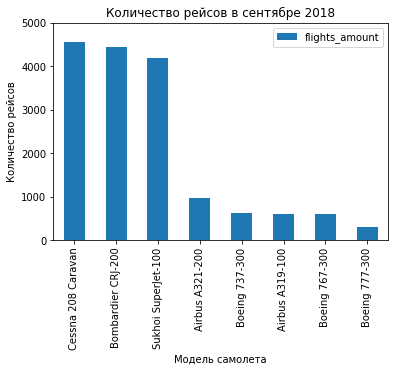

In [12]:
# модель самолета и количество рейсов
(data1
    .pivot_table(index='model',values='flights_amount',aggfunc='sum')
    .sort_values('flights_amount', ascending=False)
    .plot(kind='bar', ylim=(0,5000))
)
plt.title('Количество рейсов в сентябре 2018')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.show()

Далее, обогатим данные количеством пассажирских мест для каждой модели самолетов и посмотрим уже на пассажиропоток в сентябре 2018. Принимая за условие, что каждый рейс улетал полностью заполненным.

In [13]:
# добавим столбец с количеством пассажирских мест для каждой модели самолета
data1.loc[data1['model']=='Cessna 208 Caravan', 'volume']=13
data1.loc[data1['model']=='Bombardier CRJ-200', 'volume']=50
data1.loc[data1['model']=='Sukhoi SuperJet-100', 'volume']=98
data1.loc[data1['model']=='Airbus A321-200', 'volume']=220
data1.loc[data1['model']=='Boeing 737-300', 'volume']=149
data1.loc[data1['model']=='Airbus A319-100', 'volume']=124
data1.loc[data1['model']=='Boeing 767-300', 'volume']=375
data1.loc[data1['model']=='Boeing 777-300', 'volume']=550

In [14]:
# посчитаем пассажиропоток для каждой модели самолета
data1['traffic']=data1['flights_amount']*data1['volume']

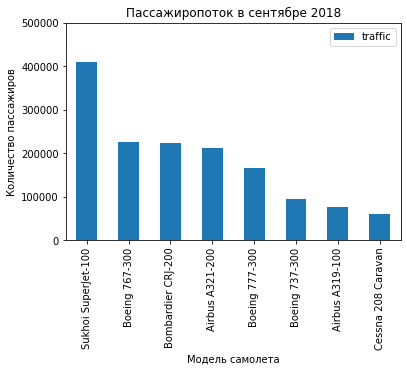

In [15]:
# посмотрим на пассажиропоток по моделям самолета
(data1
    .pivot_table(index='model',values='traffic',aggfunc='sum')
    .sort_values('traffic', ascending=False)
    .plot(kind='bar', ylim=(0,500000))
)
plt.title('Пассажиропоток в сентябре 2018')
plt.xlabel('Модель самолета')
plt.ylabel('Количество пассажиров')
plt.show()

Чаще всего рейсы совершали на самолете **"Cessna 208 Caravan"**, при этом на этом самолете перевезли меньше всего пассажирова в сентябре 2018. Можно предположить, что эта модель самолета используется в местных регионных авиакомпаниях для короткого сообщения между городами.  
Больше всего пассажиров перевез самолет **"Sukhoi SuperJet-100"**, также стоит отметить самолет **"Boeing 767-300"**, которые занимает второе место по пассажиропотоку и только седьмое по количеству рейсов. 

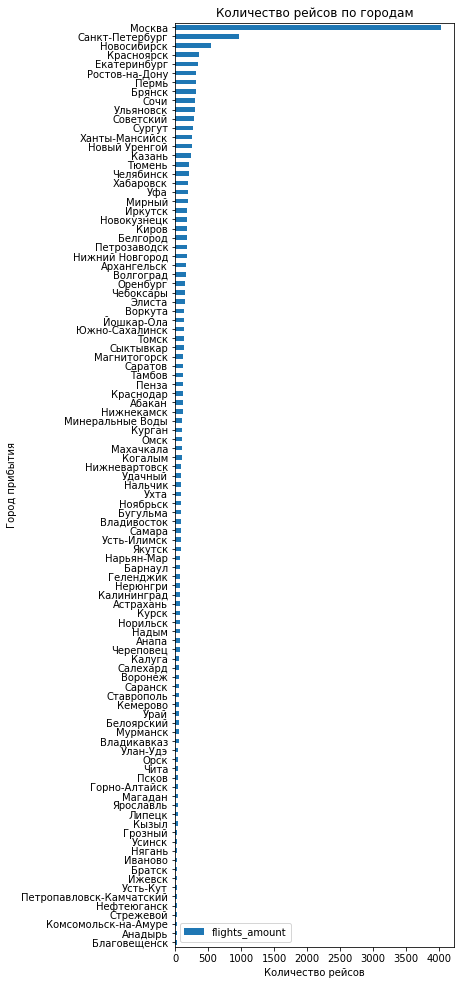

In [16]:
# город и количество рейсов
(data2
    .pivot_table(index='city',values='flights_amount',aggfunc='sum')
    .sort_values('flights_amount', ascending=True)
    .plot(kind='barh', ylim=(0,4100), figsize=(5, 17))
)
plt.title('Количество рейсов по городам')
plt.xlabel('Количество рейсов')
plt.ylabel('Город прибытия')
plt.show()

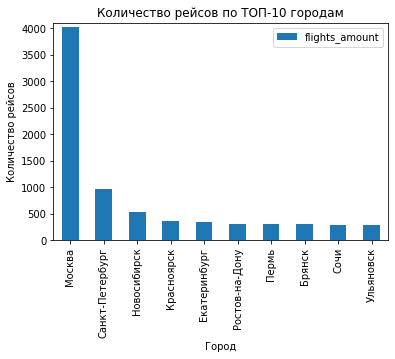

In [17]:
# ТОП-10 городов и количество рейсов
(top10
    .pivot_table(index='city', values='flights_amount',aggfunc='sum')
    .sort_values('flights_amount', ascending=False)
    .plot(kind='bar', ylim=(0,4100))
)
plt.title('Количество рейсов по ТОП-10 городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

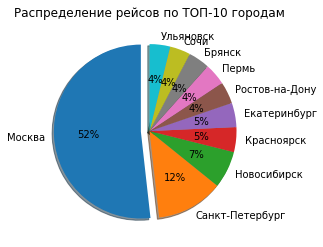

In [18]:
# Доли по количеству рейсов относительно ТОП-10 городов
plt.pie(top10['flights_amount'], explode=[0.1,0,0,0,0,0,0,0,0,0], labels=top10['city'],autopct='%.0f%%', 
       shadow=True, startangle=90)
plt.title('Распределение рейсов по ТОП-10 городам')
plt.show()

Подавляющее большинство рейсов в августе 2018 прибывало в **Москву**.   
Так, более половины всех рейсов из ТОП-10 городов (по количеству рейсов) приходилось на **Москву**.  
На втором месте по количеству прибывающих рейсов - **Санкт-Петербург**.

Далее, обогатим данные размером населения в городах с численностью населения 100 тыс. и более при помощи парсинга из открытых источников в Интернете. 

In [19]:
# преобразуем HTML-страницу в объект BeatifulSoup
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

In [20]:
# соберем в список heading_table названия столбцов таблицы
heading_table = []
for row in soup.find_all('th'):
    heading_table.append(row.text)

<div class="alert alert-block alert-info">
    

### Комментарий студента
Следующий шаг немного корявый :( В Википедии две таблицы подряд и путем поисках всех `'th'` он добавляет в список ненужные нам столбцы. Не придумал как сделать без ручного выбора(
</div>   

In [21]:
# 
heading_table=['№',
  '№',
 'Город',
 '1897',
 '1926',
 '1939',
 '1959',
 '1970',
 '1979',
 '1989',
 '2002',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [22]:
# добавляем в список content число жителей городо
content = []
for row in soup.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

In [23]:
# создаем датафрейм
cities = pd.DataFrame(content, columns=heading_table)

In [24]:
# убираем ненужные столбцы датафрейма все кроме названия города и 2018 года
cities = cities.drop(cities.columns[[0, 1, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21]], axis='columns')

In [25]:
# убираем в названиях городов наличие сносок 
cities['Город'] = cities['Город'].str.split('[',expand=True)

# меняем название для колонок
cities.columns = ['city', 'population']

In [26]:
# проверяем сколько городов в выборке меньше 100+
data2['city'].isin(cities['city']).value_counts()

True     76
False    25
Name: city, dtype: int64

In [27]:
# объединяем таблицы
data2 = data2.merge(cities, how='left', on='city')

In [28]:
# Заменяем пропущенные значения в численности населения для городов с населением меньше 100к на условные 50 тыс.
data2.loc[data2['population'].isna(), 'population'] = 50

In [29]:
# заменяем типы на целочисленный
data2['population']=data2['population'].astype(int)
data2['flights_amount']=data2['flights_amount'].astype(int)

In [30]:
# Посмотрим есть ли корреляция между размером населения в городе и количеством рейсов в него 
print('Коэффициент корреляции: {:.2f}'.format(data2['flights_amount'].corr(data2['population'])))

Коэффициент корреляции: 0.96


Был обнаружена **сильная прямая корреляция** между размером населения в городе и количеством рейсов в него - чем больше населения в городе, тем больше и рейсов прилетает в этот город.

### Шаг 4. Основные выводы

<a id='6-bullet'></a>
#### 4.1. Основные выводы

  - В сентябре 2018 года больше всего было зарегестрированно полетов на самолете **Cessna 208 Caravan** при этом на этом самолете перевезли меньше всего пассажирова в сентябре 2018. Можно предположить, что эта модель самолета используется в местных регионных авиакомпаниях для короткого сообщения между городами.  
  Больше всего пассажиров в сентябре 2018 перевез самолет **"Sukhoi SuperJet-100"**, также стоит отметить самолет **"Boeing 767-300"**, которые занимает второе место по пассажиропотоку и только седьмое по количеству рейсов. 
  - В августе 2018 года подавляющее большинство самолетов прилетало в **Москву**. Это достаточно очевидно в виду того, что Москва  является самым крупным Российским транспортным хабом.  
Также была обнаружена **сильная корреляция** между размером населения в городе и количеством рейсов в него - чем город больше, тем больше и рейсов прилетает в него.